In [1]:
#Reading the dataset
import pandas as pd
columns=['ID', 'Topic', 'Sentiment', 'Text']
data = pd.read_csv("twitter_training.csv",names=columns)
data

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:
data.shape

(74682, 4)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
#Checking for null/missing values in the dataset
data.isnull().sum()

,0
ID,0
Topic,0
Sentiment,0
Text,686


In [5]:
data.dropna(inplace=True)


In [6]:
#Cheking for dulicate values :
data.duplicated().sum()


2340

In [7]:
data.drop_duplicates(inplace=True)


In [8]:
data.duplicated().sum()


0

<ipython-input-9-4b9dad2863d7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=data,palette='coolwarm')


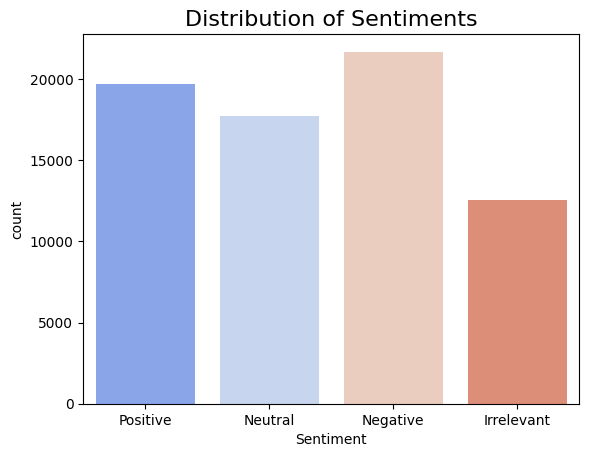

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'Sentiment',data=data,palette='coolwarm')
plt.title('Distribution of Sentiments', fontsize=16)
plt.show()

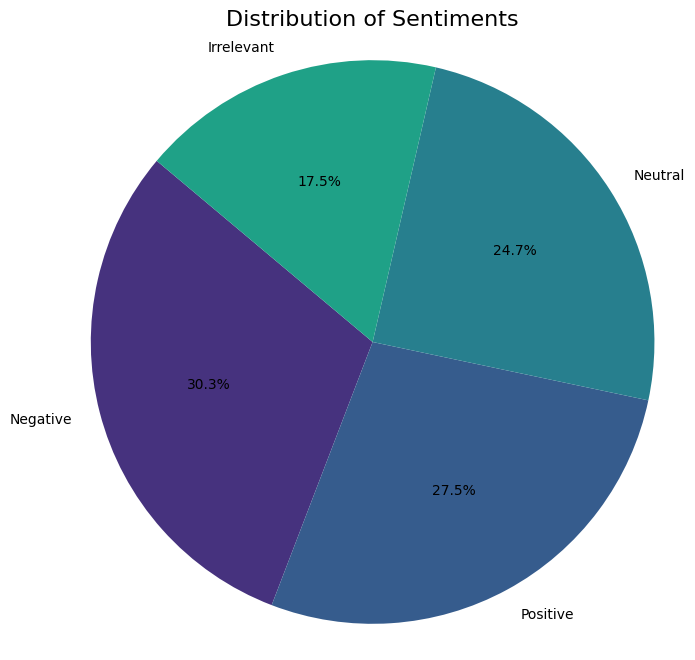

In [10]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque sentiment
sentiment_counts = data['Sentiment'].value_counts()
# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
# Ajouter un titre
plt.title('Distribution of Sentiments', fontsize=16)
# Afficher le graphique
plt.axis('equal')
plt.show()


***observation ***: Most of the Topics have negative sentiment



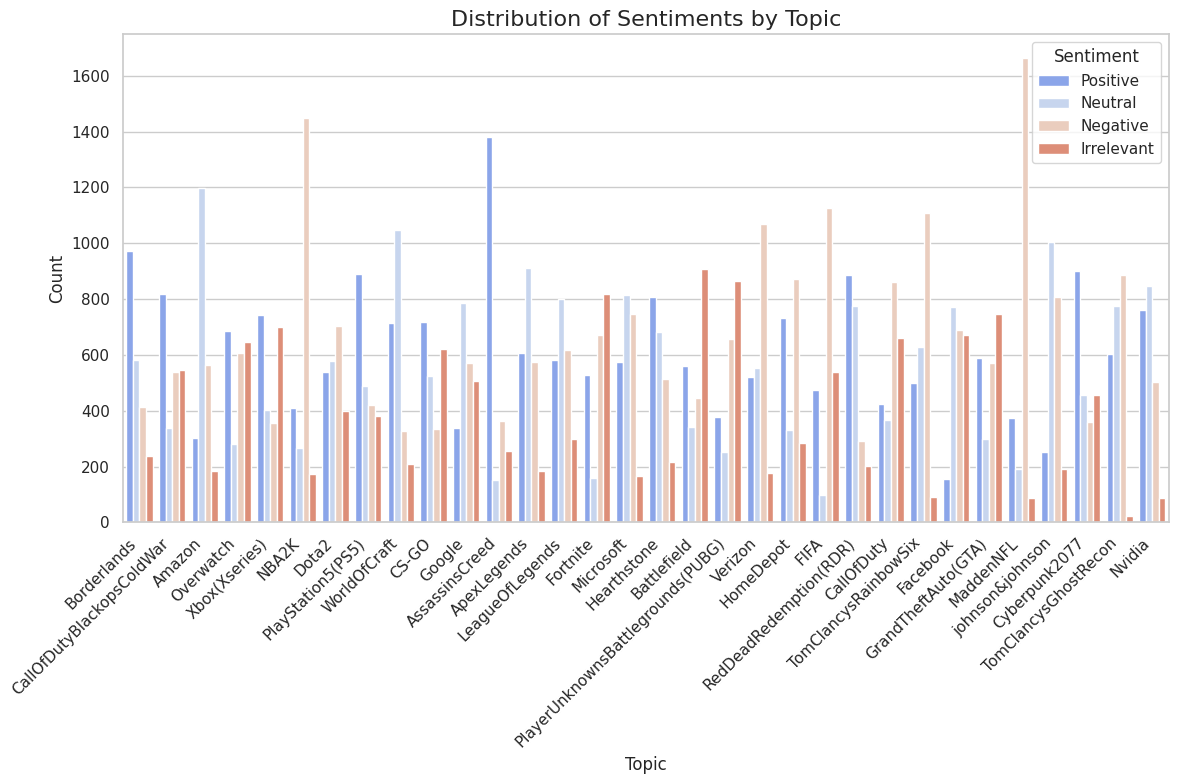

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style du graphique
sns.set(style="whitegrid")

# Ajuster la taille de la figure
plt.figure(figsize=(12, 8))
# Créer le graphique en barres groupées
sns.countplot(x='Topic', hue='Sentiment', data=data, palette='coolwarm')
# Ajouter un titre et des étiquettes
plt.title('Distribution of Sentiments by Topic', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Afficher le graphique
plt.tight_layout()
plt.show()


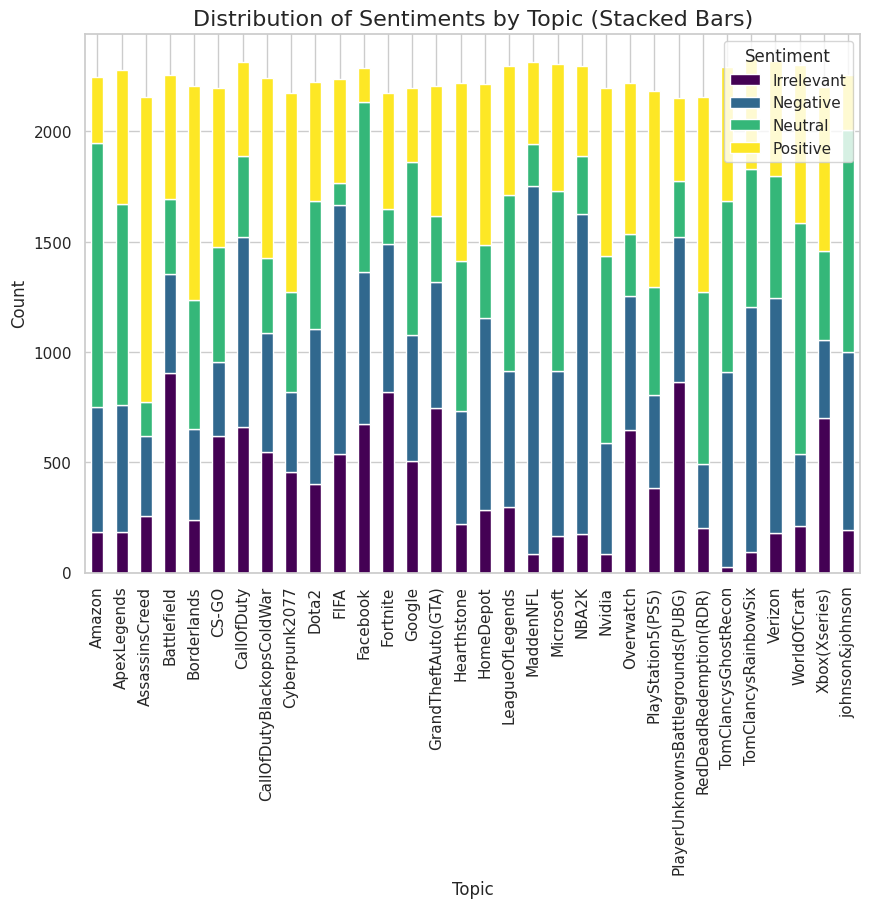

In [12]:
# Calculer les fréquences des sentiments par sujet
sentiment_counts = data.groupby(['Topic', 'Sentiment']).size().unstack()
# Créer le diagramme en barres empilées
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
# Ajouter un titre et des étiquettes
plt.title('Distribution of Sentiments by Topic (Stacked Bars)', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Afficher le graphique
plt.show()

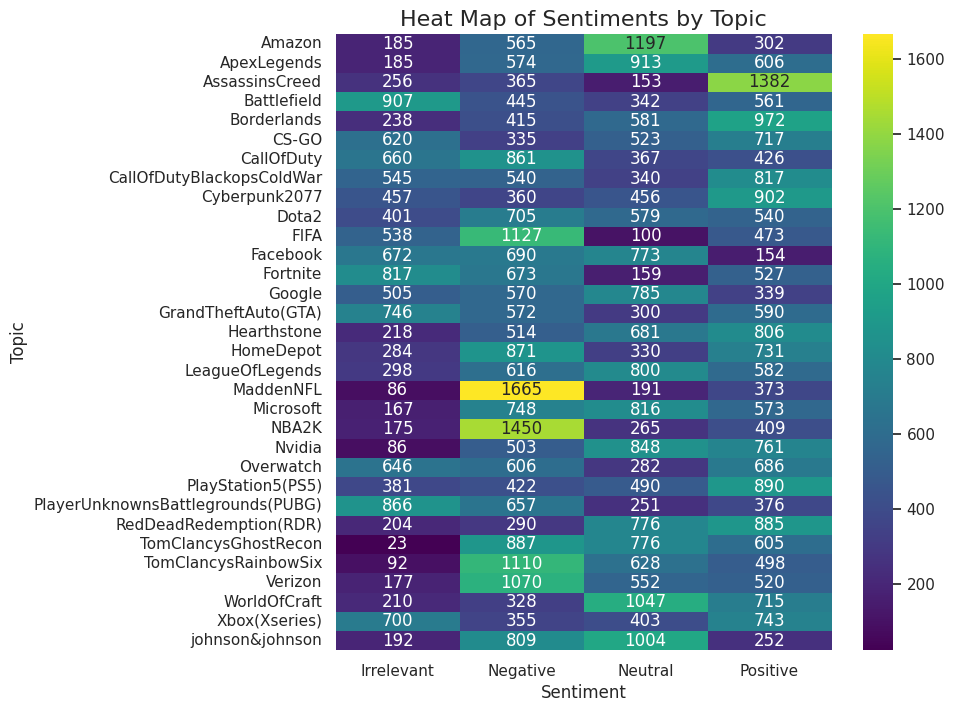

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une table de fréquence (matrice)
heatmap_data = data.groupby(['Topic', 'Sentiment']).size().unstack()
# Configurer la taille de la figure
plt.figure(figsize=(8, 8))
# Créer la heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='viridis')
# Ajouter un titre
plt.title('Heat Map of Sentiments by Topic', fontsize=16)
# Afficher le graphique
plt.show()


In [14]:
data['msg_length'] = data['Text'].apply(len)


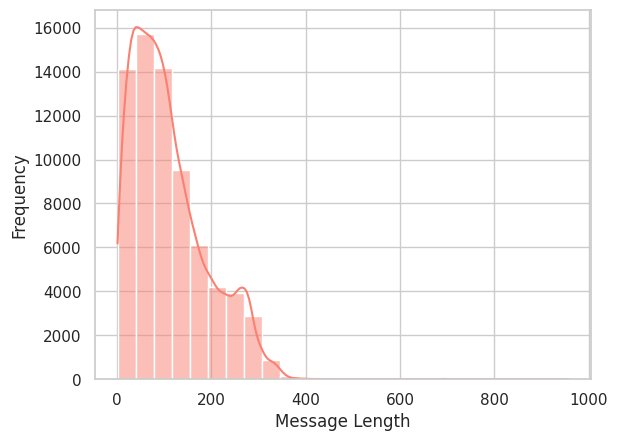

In [15]:
# Plot message length distribution for training data
sns.histplot(data['msg_length'], bins=25,kde=True, color='salmon')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()



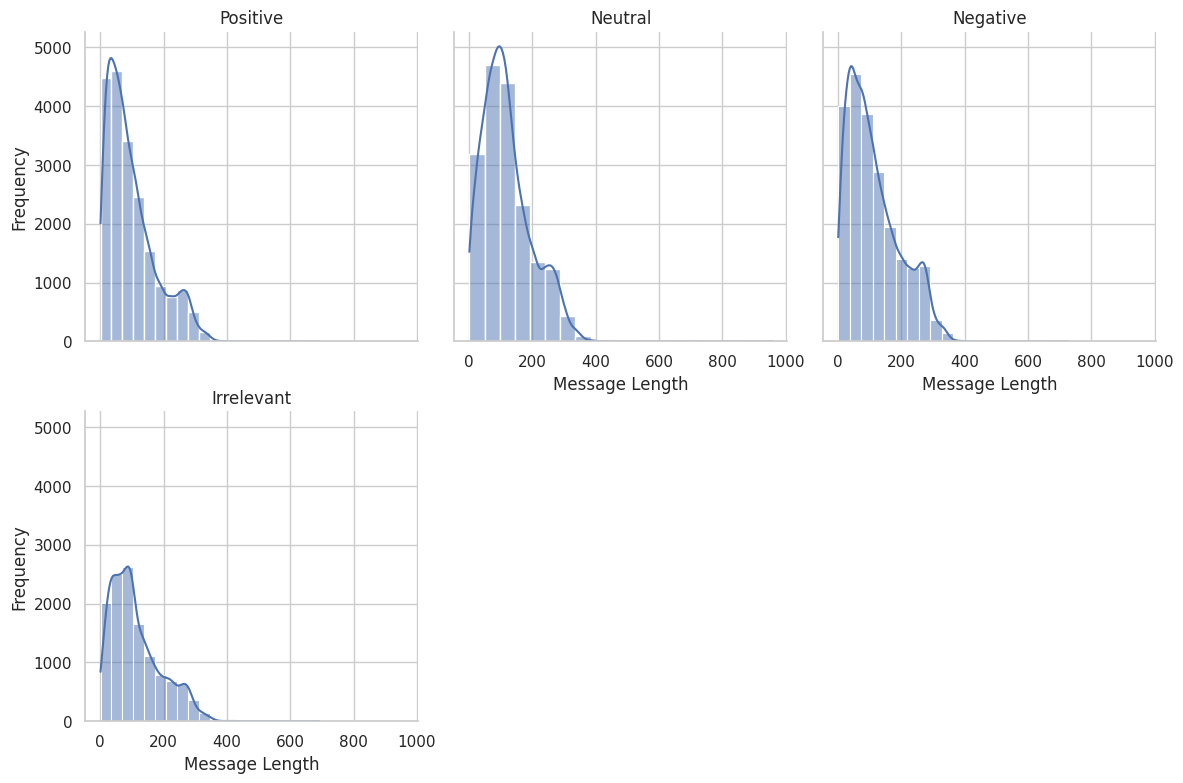

In [16]:
g = sns.FacetGrid(data, col='Sentiment', col_wrap=3, height=4)
g.map(sns.histplot, 'msg_length', bins=20, kde=True)
g.set_titles("{col_name}")
g.set_axis_labels("Message Length", "Frequency")
plt.show()


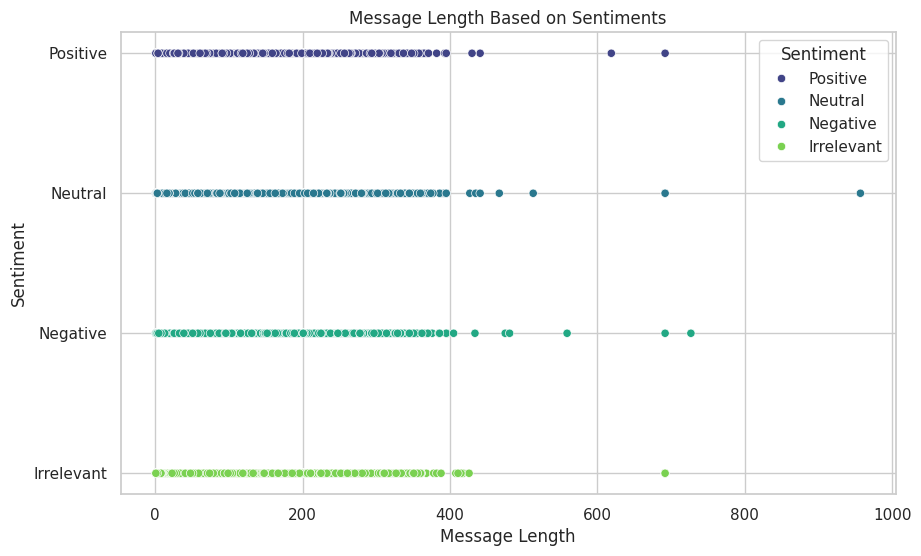

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='msg_length', y='Sentiment', hue='Sentiment', palette='viridis')
plt.title('Message Length Based on Sentiments')
plt.xlabel('Message Length')
plt.ylabel('Sentiment')
plt.legend(title='Sentiment')
plt.show()


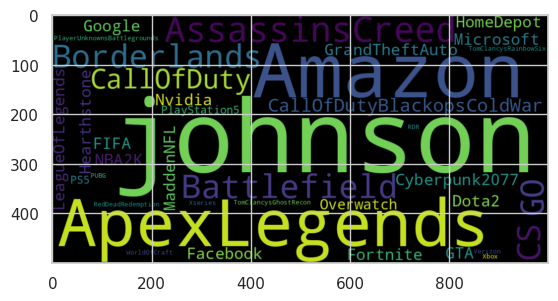

In [18]:
from wordcloud import WordCloud
crosstab = pd.crosstab(index=data['Topic'], columns=data['Sentiment'])
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width=1000, height=500).generate(topic_list)
plt.imshow(wc, interpolation='bilinear')

In [19]:
data['Topic'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

**Conclusion** :
Based on the observations from the Twitter sentiment analysis task, it can be concluded that :   

1.  Among the topics analyzed, "MaddenNFL" exhibits the highest level of Negative sentiment, while "AssassinsCreed" is associated with the most Positive sentiment. "Amazon" stands out for having the most Neutral sentiment, and "Battlefield" is noted for its greatest proportion of Irrelevant sentiment.

2.   The sentiment analysis shows that negative sentiments are the most common, representing 30.3% of the total. Positive sentiments are the next most frequent, making up 27.5% of the data. Neutral sentiments are also significant, at 24.7%, reflecting a fairly even spread between positive and neutral feelings. Irrelevant sentiments, while less common, still account for a notable 17.5% of the overall sentiments.

3.   Another key finding is that most of the analyzed messages are fewer than 400 words long. This suggests that Twitter users prefer to express their sentiments briefly and directly, in line with the platform's character constraints.

To conclude, the sentiment analysis sheds light on the prevailing attitudes and opinions across Twitter concerning various topics. While negative sentiments are generally more frequent, there is a broad spectrum of sentiments expressed about different subjects.








